# Kapitz Pendulum

$$
  L(\theta) = \frac{m}{2}(r^2\cos^2\theta \dot{\theta}^2 + \cdots)
$$

$$
  \ddot{\theta} = \frac{g + \ddot{h}}{r} \sin\theta 
$$


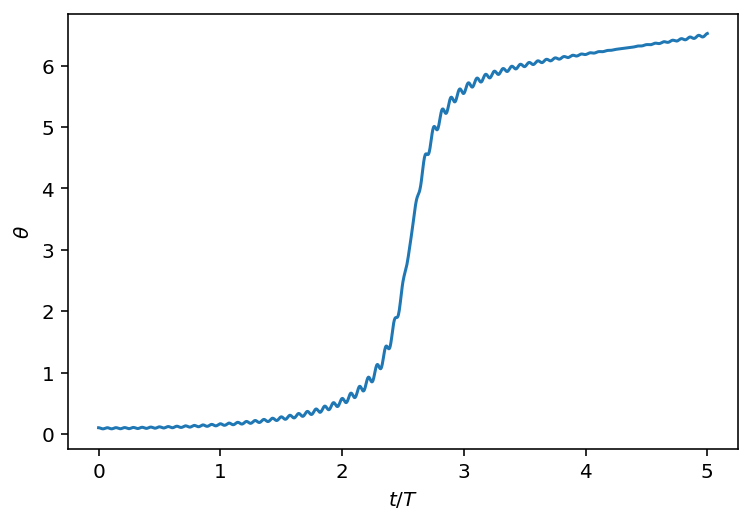

In [36]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = r = m = 1.0
w0 = np.sqrt(g / r)
h0 = 0.1
w = 14   # Looks like the threshold is h0*w = sqrt(2)


def h(t, d=0):
    """Return the dth derivative of h(t)."""
    if d == 0:
        return h0 * np.cos(w * t)
    elif d == 1:
        return -w * h0 * np.sin(w * t)
    else:
        return -w**2 * h(t, d=d - 2)


def compute_dy_dt(t, y):
    theta, dtheta = y
    ddtheta = (g + h(t=t, d=2)) / r * np.sin(theta)
    return (dtheta, ddtheta)


y0 = (0.1, 0)
T = 2 * np.pi / w0
t_span = (0, 5 * T)

res = solve_ivp(fun=compute_dy_dt, t_span=t_span, y0=y0, atol=1e-8, rtol=1e-8)
ts = res.t
thetas, dthetas = res.y

fig, ax = plt.subplots()
ax.plot(ts/T, thetas)
ax.set(xlabel='$t/T$', ylabel=r'$\theta$');

## Code from Class Notes to Compare

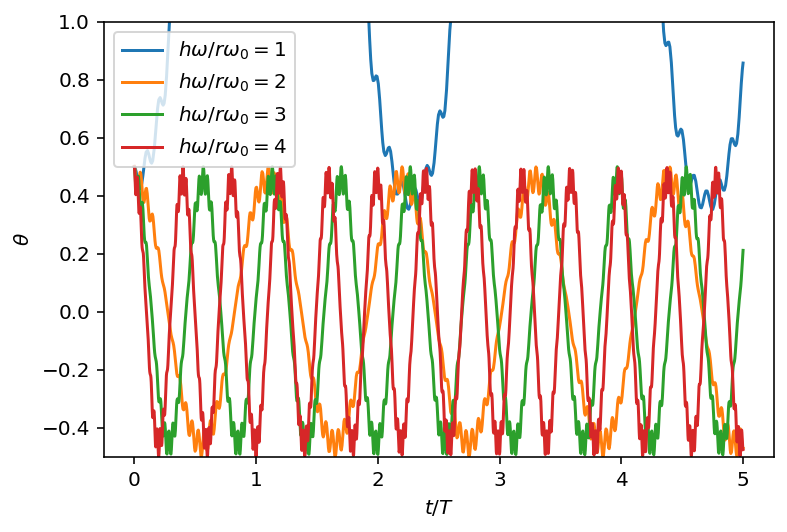

In [27]:
from scipy.integrate import solve_ivp

m = g = r = 1.0
w0 = np.sqrt(g / r)


def h(t, h0, w, d=0):
    """Return the `d`'th derivative of `h(t)`."""
    if d == 0:
        return h0 * np.cos(w * t)
    elif d == 1:
        return w * h0 * np.sin(w * t)
    else:
        return -w**2 * h(t, h0=h0, w=w, d=d - 2)


def compute_dy_dt(t, y, h0, w):
    theta, dtheta = y
    ddtheta = (g + h(t, h0=h0, w=w, d=2)) / r * np.sin(theta)
    return (dtheta, ddtheta)


hws = [1, 2, 3, 4]

h0 = 0.1
y0 = (0.5, 0)
T = 2 * np.pi / w0
t_span = (0, 5 * T)  # 5 oscillations


def fun(t, y):
    return compute_dy_dt(t=t, y=y, **args)


fig, ax = plt.subplots()

for hw in hws:
    args = dict(h0=h0, w=hw / h0)
    res = solve_ivp(fun, t_span=t_span, y0=y0, atol=1e-6, rtol=1e-6)
    ts = res.t
    thetas, dthetas = res.y
    ax.plot(ts / T, thetas, label=fr'$h\omega/r\omega_0 = {hw}$')
ax.set(xlabel=r'$t/T$', ylabel=r'$\theta$', ylim=(-y0[0], 2 * y0[0]))
ax.legend()